In [1]:
import polars as pl
from polars import col
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import polars.selectors as cs
from datetime import datetime
import re
import pandas as pd
pl.Config.set_tbl_cols(-1)
plt.rcParams['figure.figsize'] = [16, 6]


In [2]:
schema = {'price' : pl.Float64,
          'rent' : pl.Float64,
          'area': pl.Float64,
          'extras': pl.String,
          'price_per_sq_m': pl.Float64,
          'no_rooms': pl.String,
          'market_type': pl.String,
          'building_type': pl.String,
          'no_floor': pl.String,
          'building_floors_num': pl.Int64,
          'windows_type': pl.String,
          'construction_status': pl.String,
          'building_ownership': pl.String,
          'lat': pl.Float64,
          'long': pl.Float64,
          'district': pl.String,
          'built_year': pl.Int64,
          'url': pl.String
          }

In [3]:
curr_month = datetime.now().strftime('%Y-%m')
flats = pl.read_csv(f'otodom_scraped_{curr_month}.csv', separator=';', quote_char='"', schema=schema)

In [4]:
flats

price,rent,area,extras,price_per_sq_m,no_rooms,market_type,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url
f64,f64,f64,str,f64,str,str,str,str,i64,str,str,str,f64,f64,str,i64,str
822000.0,692.0,46.41,"""balcony, lift""",17712.0,"""2""","""secondary""","""block""","""floor_3""",5,"""plastic""","""ready_to_use""","""full_ownership""",52.256687,20.932893,"""bemowo""",2006,"""https://www.otodom.pl/pl/ofert…"
1.14e6,830.0,52.99,"""garage, garden, terrace, lift,…",21513.0,"""3""","""secondary""","""block""","""ground_floor""",5,"""""","""ready_to_use""","""full_ownership""",52.2198,20.896981,"""bemowo""",2018,"""https://www.otodom.pl/pl/ofert…"
1.131634e6,null,74.45,"""balcony, garage, terrace, lift""",15200.0,"""4""","""primary""","""apartment""","""floor_1""",5,"""""","""to_completion""","""""",52.23266,20.896844,"""bemowo""",null,"""https://www.otodom.pl/pl/ofert…"
1.414987e6,null,90.0,"""balcony, garage, terrace, lift""",15722.0,"""5""","""primary""","""apartment""","""floor_1""",5,"""""","""to_completion""","""""",52.227951,20.880627,"""bemowo""",null,"""https://www.otodom.pl/pl/ofert…"
779000.0,596.0,40.0,"""lift, balcony, separate_kitche…",19475.0,"""2""","""secondary""","""apartment""","""floor_3""",6,"""""","""to_completion""","""full_ownership""",52.226296,20.896134,"""bemowo""",2024,"""https://www.otodom.pl/pl/ofert…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1.1e6,850.0,50.0,"""garage, garden, terrace, lift,…",22000.0,"""3""","""secondary""","""block""","""ground_floor""",10,"""plastic""","""ready_to_use""","""full_ownership""",52.2749,20.962025,"""zoliborz""",2016,"""https://www.otodom.pl/pl/ofert…"
920000.0,940.0,64.48,"""balcony, basement, separate_ki…",14268.0,"""3""","""secondary""","""block""","""floor_4""",4,"""plastic""","""ready_to_use""","""full_ownership""",52.271121,20.960416,"""zoliborz""",1968,"""https://www.otodom.pl/pl/ofert…"
3.6e6,3385.52,236.0,"""balcony, basement, garden, sep…",15254.0,"""6""","""secondary""","""apartment""","""floor_2""",2,"""wooden""","""ready_to_use""","""""",52.266819,20.972621,"""zoliborz""",1999,"""https://www.otodom.pl/pl/ofert…"


In [5]:
#adding unique identifier as hash for later loading of data into sql db and removing duplicates
flats = flats.with_columns(
    pl.struct(pl.all())
    .hash()
    .reinterpret(signed=True)
    .alias('id')
)

flats = flats.select(['id'] + [col for col in flats.columns if col != 'id'])
flats

id,price,rent,area,extras,price_per_sq_m,no_rooms,market_type,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url
i64,f64,f64,f64,str,f64,str,str,str,str,i64,str,str,str,f64,f64,str,i64,str
2733784444739916632,822000.0,692.0,46.41,"""balcony, lift""",17712.0,"""2""","""secondary""","""block""","""floor_3""",5,"""plastic""","""ready_to_use""","""full_ownership""",52.256687,20.932893,"""bemowo""",2006,"""https://www.otodom.pl/pl/ofert…"
1760504099202448542,1.14e6,830.0,52.99,"""garage, garden, terrace, lift,…",21513.0,"""3""","""secondary""","""block""","""ground_floor""",5,"""""","""ready_to_use""","""full_ownership""",52.2198,20.896981,"""bemowo""",2018,"""https://www.otodom.pl/pl/ofert…"
-5928285467007780437,1.131634e6,null,74.45,"""balcony, garage, terrace, lift""",15200.0,"""4""","""primary""","""apartment""","""floor_1""",5,"""""","""to_completion""","""""",52.23266,20.896844,"""bemowo""",null,"""https://www.otodom.pl/pl/ofert…"
-3302733610605828522,1.414987e6,null,90.0,"""balcony, garage, terrace, lift""",15722.0,"""5""","""primary""","""apartment""","""floor_1""",5,"""""","""to_completion""","""""",52.227951,20.880627,"""bemowo""",null,"""https://www.otodom.pl/pl/ofert…"
9059771879511685920,779000.0,596.0,40.0,"""lift, balcony, separate_kitche…",19475.0,"""2""","""secondary""","""apartment""","""floor_3""",6,"""""","""to_completion""","""full_ownership""",52.226296,20.896134,"""bemowo""",2024,"""https://www.otodom.pl/pl/ofert…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1191148879188779156,1.1e6,850.0,50.0,"""garage, garden, terrace, lift,…",22000.0,"""3""","""secondary""","""block""","""ground_floor""",10,"""plastic""","""ready_to_use""","""full_ownership""",52.2749,20.962025,"""zoliborz""",2016,"""https://www.otodom.pl/pl/ofert…"
-1581560747639262196,920000.0,940.0,64.48,"""balcony, basement, separate_ki…",14268.0,"""3""","""secondary""","""block""","""floor_4""",4,"""plastic""","""ready_to_use""","""full_ownership""",52.271121,20.960416,"""zoliborz""",1968,"""https://www.otodom.pl/pl/ofert…"
4047240373042390779,3.6e6,3385.52,236.0,"""balcony, basement, garden, sep…",15254.0,"""6""","""secondary""","""apartment""","""floor_2""",2,"""wooden""","""ready_to_use""","""""",52.266819,20.972621,"""zoliborz""",1999,"""https://www.otodom.pl/pl/ofert…"


In [6]:
flats.filter(col('id').is_duplicated()== True)

id,price,rent,area,extras,price_per_sq_m,no_rooms,market_type,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url
i64,f64,f64,f64,str,f64,str,str,str,str,i64,str,str,str,f64,f64,str,i64,str
1760504099202448542,1.14e6,830.0,52.99,"""garage, garden, terrace, lift,…",21513.0,"""3""","""secondary""","""block""","""ground_floor""",5,"""""","""ready_to_use""","""full_ownership""",52.2198,20.896981,"""bemowo""",2018,"""https://www.otodom.pl/pl/ofert…"
6107698841314764840,599000.0,null,50.37,"""balcony, basement, separate_ki…",11892.0,"""2""","""secondary""","""block""","""floor_3""",4,"""plastic""","""to_renovation""","""limited_ownership""",52.225283,20.907841,"""bemowo""",1976,"""https://www.otodom.pl/pl/ofert…"
-7687139941220695984,null,null,null,"""""",null,"""""","""""","""""","""""",null,"""""","""""","""""",52.230763,20.890401,"""bemowo""",null,"""https://www.otodom.pl/pl/ofert…"
-6788274200307133192,1.1e6,770.0,55.37,"""balcony, garage, basement, lif…",19866.0,"""3""","""secondary""","""block""","""floor_1""",2,"""plastic""","""ready_to_use""","""full_ownership""",52.236768,20.893931,"""bemowo""",null,"""https://www.otodom.pl/pl/ofert…"
-8395870092274800171,null,null,43.69,"""garage, balcony, lift""",null,"""2""","""primary""","""""","""floor_2""",6,"""""","""to_completion""","""full_ownership""",52.227326,20.884553,"""bemowo""",2027,"""https://www.otodom.pl/pl/ofert…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1489897664290640891,1.05e6,650.0,40.52,"""lift""",25913.0,"""2""","""secondary""","""apartment""","""floor_5""",6,"""wooden""","""ready_to_use""","""full_ownership""",52.259595,20.9691,"""zoliborz""",2014,"""https://www.otodom.pl/pl/ofert…"
4464239319574654387,889000.0,1100.0,42.0,"""balcony, garage, basement, lif…",21167.0,"""2""","""secondary""","""tenement""","""floor_3""",4,"""plastic""","""to_renovation""","""full_ownership""",52.26364,20.980672,"""zoliborz""",1949,"""https://www.otodom.pl/pl/ofert…"
-7480407248597969844,465000.0,350.0,27.5,"""basement, lift""",16909.0,"""1""","""secondary""","""block""","""ground_floor""",10,"""plastic""","""ready_to_use""","""full_ownership""",52.268191,20.958572,"""zoliborz""",1978,"""https://www.otodom.pl/pl/ofert…"


In [7]:
flats = flats.unique(subset='id', keep='first', maintain_order=True)

In [8]:
flats.describe()

statistic,id,price,rent,area,extras,price_per_sq_m,no_rooms,market_type,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url
str,f64,f64,f64,f64,str,f64,str,str,str,str,f64,str,str,str,f64,f64,str,f64,str
"""count""",11593.0,11252.0,8576.0,11461.0,"""11593""",11252.0,"""11593""","""11593""","""11593""","""11593""",10798.0,"""11593""","""11593""","""11593""",11593.0,11593.0,"""11593""",10688.0,"""11593"""
"""null_count""",0.0,341.0,3017.0,132.0,"""0""",341.0,"""0""","""0""","""0""","""0""",795.0,"""0""","""0""","""0""",0.0,0.0,"""0""",905.0,"""0"""
"""mean""",-6.5504e16,1.2057e6,1043.960637,61.456595,null,18845.792748,null,null,null,null,6.265605,null,null,null,52.22978,21.009191,null,1996.487088,null
"""std""",5.3352e18,1.1304e6,14008.631746,36.985218,null,6792.612632,null,null,null,null,4.85017,null,null,null,0.048898,0.065007,null,49.409177,null
"""min""",-9.2218e18,237000.0,0.0,11.0,"""""",2435.0,"""""","""""","""""","""""",1.0,"""""","""""","""""",52.099827,20.854778,"""bemowo""",20.0,"""https://www.otodom.pl/hpr/pl/o…"
"""25%""",-4.6999e18,689000.0,490.0,40.8,null,14638.0,null,null,null,null,4.0,null,null,null,52.19512,20.964457,null,1974.0,null
"""50%""",-3.0890e16,888093.0,740.0,53.97,null,17420.0,null,null,null,null,5.0,null,null,null,52.227944,21.009005,null,2009.0,null
"""75%""",4.5343e18,1.28e6,1000.0,69.92,null,20980.0,null,null,null,null,8.0,null,null,null,52.255873,21.056084,null,2024.0,null
"""max""",9.2220e18,2.5e7,960000.0,1892.03,"""usable_room, terrace, balcony,…",92471.0,"""more""","""secondary""","""tenement""","""ground_floor""",54.0,"""wooden""","""to_renovation""","""usufruct""",52.368969,21.25482,"""zoliborz""",2028.0,"""https://www.otodom.pl/pl/ofert…"


In [9]:
flats.null_count()

id,price,rent,area,extras,price_per_sq_m,no_rooms,market_type,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,341,3017,132,0,341,0,0,0,0,795,0,0,0,0,0,0,905,0


In [10]:
#we want to get rid of the flats which don't have the value in price column since those are not informative for us
flats.filter(col('price').is_null())

id,price,rent,area,extras,price_per_sq_m,no_rooms,market_type,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url
i64,f64,f64,f64,str,f64,str,str,str,str,i64,str,str,str,f64,f64,str,i64,str
-7687139941220695984,null,null,null,"""""",null,"""""","""""","""""","""""",null,"""""","""""","""""",52.230763,20.890401,"""bemowo""",null,"""https://www.otodom.pl/pl/ofert…"
-8395870092274800171,null,null,43.69,"""garage, balcony, lift""",null,"""2""","""primary""","""""","""floor_2""",6,"""""","""to_completion""","""full_ownership""",52.227326,20.884553,"""bemowo""",2027,"""https://www.otodom.pl/pl/ofert…"
-5680412168128754764,null,null,null,"""""",null,"""""","""""","""""","""""",null,"""""","""""","""""",52.248791,20.921323,"""bemowo""",null,"""https://www.otodom.pl/pl/ofert…"
895940803867718257,null,null,null,"""""",null,"""""","""""","""""","""""",null,"""""","""""","""""",52.227326,20.884553,"""bemowo""",null,"""https://www.otodom.pl/pl/ofert…"
-564293267396898000,null,null,37.98,"""garage, terrace, garden, lift""",null,"""2""","""primary""","""""","""ground_floor""",3,"""""","""to_completion""","""full_ownership""",52.22175,20.88847,"""bemowo""",2027,"""https://www.otodom.pl/pl/ofert…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-8005666863866449785,null,null,123.32,"""garage, garden, lift""",null,"""4""","""primary""","""""","""ground_floor""",8,"""""","""to_completion""","""full_ownership""",52.229129,20.941538,"""wola""",2026,"""https://www.otodom.pl/pl/ofert…"
5718695644056696644,null,null,63.6,"""garage, garden, lift""",null,"""3""","""primary""","""""","""ground_floor""",8,"""""","""to_completion""","""full_ownership""",52.229129,20.941538,"""wola""",2026,"""https://www.otodom.pl/pl/ofert…"
7358912440898306846,null,null,112.1,"""garage, balcony, lift""",null,"""3""","""primary""","""""","""floor_1""",8,"""""","""to_completion""","""full_ownership""",52.229129,20.941538,"""wola""",2026,"""https://www.otodom.pl/pl/ofert…"


In [11]:
flats = flats.filter(col('price').is_not_null())

In [12]:
flats.head(20)

id,price,rent,area,extras,price_per_sq_m,no_rooms,market_type,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url
i64,f64,f64,f64,str,f64,str,str,str,str,i64,str,str,str,f64,f64,str,i64,str
2733784444739916632,822000.0,692.0,46.41,"""balcony, lift""",17712.0,"""2""","""secondary""","""block""","""floor_3""",5,"""plastic""","""ready_to_use""","""full_ownership""",52.256687,20.932893,"""bemowo""",2006,"""https://www.otodom.pl/pl/ofert…"
1760504099202448542,1.14e6,830.0,52.99,"""garage, garden, terrace, lift,…",21513.0,"""3""","""secondary""","""block""","""ground_floor""",5,"""""","""ready_to_use""","""full_ownership""",52.2198,20.896981,"""bemowo""",2018,"""https://www.otodom.pl/pl/ofert…"
-5928285467007780437,1.131634e6,null,74.45,"""balcony, garage, terrace, lift""",15200.0,"""4""","""primary""","""apartment""","""floor_1""",5,"""""","""to_completion""","""""",52.23266,20.896844,"""bemowo""",null,"""https://www.otodom.pl/pl/ofert…"
-3302733610605828522,1.414987e6,null,90.0,"""balcony, garage, terrace, lift""",15722.0,"""5""","""primary""","""apartment""","""floor_1""",5,"""""","""to_completion""","""""",52.227951,20.880627,"""bemowo""",null,"""https://www.otodom.pl/pl/ofert…"
9059771879511685920,779000.0,596.0,40.0,"""lift, balcony, separate_kitche…",19475.0,"""2""","""secondary""","""apartment""","""floor_3""",6,"""""","""to_completion""","""full_ownership""",52.226296,20.896134,"""bemowo""",2024,"""https://www.otodom.pl/pl/ofert…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-7172773454886145074,800000.0,1000.0,64.3,"""lift, balcony, basement, separ…",12442.0,"""3""","""secondary""","""block""","""floor_1""",11,"""plastic""","""ready_to_use""","""full_ownership""",52.223274,20.898425,"""bemowo""",1978,"""https://www.otodom.pl/pl/ofert…"
1158931170558641052,1.89e6,1330.0,84.0,"""garage, lift""",22500.0,"""4""","""secondary""","""apartment""","""ground_floor""",3,"""plastic""","""ready_to_use""","""full_ownership""",52.241912,20.89799,"""bemowo""",2021,"""https://www.otodom.pl/pl/ofert…"
2248034729322847046,729000.0,896.12,48.85,"""balcony, lift""",14923.0,"""3""","""secondary""","""block""","""floor_7""",10,"""plastic""","""to_renovation""","""limited_ownership""",52.223815,20.912653,"""bemowo""",1975,"""https://www.otodom.pl/hpr/pl/o…"


In [13]:
flats

id,price,rent,area,extras,price_per_sq_m,no_rooms,market_type,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url
i64,f64,f64,f64,str,f64,str,str,str,str,i64,str,str,str,f64,f64,str,i64,str
2733784444739916632,822000.0,692.0,46.41,"""balcony, lift""",17712.0,"""2""","""secondary""","""block""","""floor_3""",5,"""plastic""","""ready_to_use""","""full_ownership""",52.256687,20.932893,"""bemowo""",2006,"""https://www.otodom.pl/pl/ofert…"
1760504099202448542,1.14e6,830.0,52.99,"""garage, garden, terrace, lift,…",21513.0,"""3""","""secondary""","""block""","""ground_floor""",5,"""""","""ready_to_use""","""full_ownership""",52.2198,20.896981,"""bemowo""",2018,"""https://www.otodom.pl/pl/ofert…"
-5928285467007780437,1.131634e6,null,74.45,"""balcony, garage, terrace, lift""",15200.0,"""4""","""primary""","""apartment""","""floor_1""",5,"""""","""to_completion""","""""",52.23266,20.896844,"""bemowo""",null,"""https://www.otodom.pl/pl/ofert…"
-3302733610605828522,1.414987e6,null,90.0,"""balcony, garage, terrace, lift""",15722.0,"""5""","""primary""","""apartment""","""floor_1""",5,"""""","""to_completion""","""""",52.227951,20.880627,"""bemowo""",null,"""https://www.otodom.pl/pl/ofert…"
9059771879511685920,779000.0,596.0,40.0,"""lift, balcony, separate_kitche…",19475.0,"""2""","""secondary""","""apartment""","""floor_3""",6,"""""","""to_completion""","""full_ownership""",52.226296,20.896134,"""bemowo""",2024,"""https://www.otodom.pl/pl/ofert…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1191148879188779156,1.1e6,850.0,50.0,"""garage, garden, terrace, lift,…",22000.0,"""3""","""secondary""","""block""","""ground_floor""",10,"""plastic""","""ready_to_use""","""full_ownership""",52.2749,20.962025,"""zoliborz""",2016,"""https://www.otodom.pl/pl/ofert…"
-1581560747639262196,920000.0,940.0,64.48,"""balcony, basement, separate_ki…",14268.0,"""3""","""secondary""","""block""","""floor_4""",4,"""plastic""","""ready_to_use""","""full_ownership""",52.271121,20.960416,"""zoliborz""",1968,"""https://www.otodom.pl/pl/ofert…"
4047240373042390779,3.6e6,3385.52,236.0,"""balcony, basement, garden, sep…",15254.0,"""6""","""secondary""","""apartment""","""floor_2""",2,"""wooden""","""ready_to_use""","""""",52.266819,20.972621,"""zoliborz""",1999,"""https://www.otodom.pl/pl/ofert…"


In [14]:
flats.sort(by='price', descending=True).head(30)

id,price,rent,area,extras,price_per_sq_m,no_rooms,market_type,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url
i64,f64,f64,f64,str,f64,str,str,str,str,i64,str,str,str,f64,f64,str,i64,str
-5083425055101059328,2.5e7,0.0,303.58,"""garden, garage, terrace""",82351.0,"""6""","""secondary""","""""","""floor_8""",8,"""""","""""","""""",52.23974,21.02375,"""srodmiescie""",2020,"""https://www.otodom.pl/pl/ofert…"
-6751126425104926424,1.9e7,null,205.47,"""lift, garage, air_conditioning""",92471.0,"""5""","""secondary""","""apartment""","""floor_higher_10""",52,"""aluminium""","""ready_to_use""","""full_ownership""",52.23116,21.00242,"""srodmiescie""",2017,"""https://www.otodom.pl/pl/ofert…"
3172730441027332553,1.7e7,null,1892.03,"""balcony""",8985.0,"""more""","""secondary""","""block""","""ground_floor""",4,"""plastic""","""""","""full_ownership""",52.206023,20.92437,"""wlochy""",2002,"""https://www.otodom.pl/pl/ofert…"
5391477637372086343,1.5745e7,0.0,191.2,"""terrace""",82348.0,"""3""","""secondary""","""""","""floor_8""",8,"""""","""""","""""",52.23974,21.02375,"""srodmiescie""",2020,"""https://www.otodom.pl/pl/ofert…"
4523633129124109520,1.45e7,5000.0,165.0,"""basement, garage, lift, air_co…",87879.0,"""4""","""secondary""","""apartment""","""floor_10""",44,"""aluminium""","""ready_to_use""","""full_ownership""",52.23541,21.00164,"""srodmiescie""",2017,"""https://www.otodom.pl/pl/ofert…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2638976264228717316,1.1e7,0.0,160.0,"""""",68750.0,"""4""","""secondary""","""""","""floor_higher_10""",44,"""""","""""","""full_ownership""",52.23542,21.0017,"""srodmiescie""",2014,"""https://www.otodom.pl/pl/ofert…"
1381291603834295866,1.08e7,0.0,160.0,"""lift, air_conditioning, garage""",67500.0,"""4""","""secondary""","""apartment""","""floor_higher_10""",44,"""""","""""","""""",52.2342,21.00174,"""srodmiescie""",2015,"""https://www.otodom.pl/pl/ofert…"
-3742882693412864427,1.05e7,7000.0,160.64,"""garage, lift""",65364.0,"""4""","""secondary""","""apartment""","""floor_higher_10""",44,"""""","""ready_to_use""","""full_ownership""",52.235493,21.00164,"""srodmiescie""",2014,"""https://www.otodom.pl/pl/ofert…"


In [15]:
flats.describe()
# Few comments at first glance: 
# 1. Prices seem ok, there are no too big of an extremes
# 2. Issues with rent, probably human mistakes while posting an offer, it's close to impossible that the rent in a flat can be 0 (minimum should probably closer to 300) or 960 0000 PLN, probably those will be replaced to null
# 3. Minimum area is ok (11^m2 can sometimes be observed) but maximum area is definitely too big for a flat - needs a more thorough check
# 4. Not all extras could be listed in extras field, sometimes extras are mentioned in description, that's why for some flats they might be missing
# 5. Only a few flats are missing the number of rooms - no need and subject matter logic to fill in the 
# 6. Market type is fine (to binary -> is_primary)
# 7. Building type - those records with nulls will be filled in with unknown (to categorical dtype)
# 8. Floor on which the apartment is situated -> values will be checked, nulls won't be filled - we can't assume anything here
# 9. Building floors - same as above
# 10. Windows -> nulls will be filled with 'unknown' (to categorical dtype)
# 11. Construction status, same as above (to categorical dtype)
# 12. Building ownership -> same as above (to categorical dtype)
# 13. Latitude and longitude are ok
# 14. District -> ok

statistic,id,price,rent,area,extras,price_per_sq_m,no_rooms,market_type,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url
str,f64,f64,f64,f64,str,f64,str,str,str,str,f64,str,str,str,f64,f64,str,f64,str
"""count""",11252.0,11252.0,8576.0,11252.0,"""11252""",11252.0,"""11252""","""11252""","""11252""","""11252""",10589.0,"""11252""","""11252""","""11252""",11252.0,11252.0,"""11252""",10479.0,"""11252"""
"""null_count""",0.0,0.0,2676.0,0.0,"""0""",0.0,"""0""","""0""","""0""","""0""",663.0,"""0""","""0""","""0""",0.0,0.0,"""0""",773.0,"""0"""
"""mean""",-6.3087e16,1.2057e6,1043.960637,61.566514,null,18845.792748,null,null,null,null,6.286807,null,null,null,52.229078,21.0093,null,1995.90104,null
"""std""",5.3354e18,1.1304e6,14008.631746,37.231531,null,6792.612632,null,null,null,null,4.86157,null,null,null,0.048327,0.064495,null,49.723041,null
"""min""",-9.2218e18,237000.0,0.0,11.0,"""""",2435.0,"""1""","""primary""","""""","""""",1.0,"""""","""""","""""",52.099827,20.854778,"""bemowo""",20.0,"""https://www.otodom.pl/hpr/pl/o…"
"""25%""",-4.6987e18,689000.0,490.0,40.78,null,14638.0,null,null,null,null,4.0,null,null,null,52.194808,20.964928,null,1973.0,null
"""50%""",-1.6902e16,888093.0,740.0,53.9,null,17420.0,null,null,null,null,5.0,null,null,null,52.227622,21.008774,null,2009.0,null
"""75%""",4.5343e18,1.28e6,1000.0,70.0,null,20980.0,null,null,null,null,8.0,null,null,null,52.25463,21.056044,null,2023.0,null
"""max""",9.2220e18,2.5e7,960000.0,1892.03,"""usable_room, terrace, balcony,…",92471.0,"""more""","""secondary""","""tenement""","""ground_floor""",54.0,"""wooden""","""to_renovation""","""usufruct""",52.364384,21.25482,"""zoliborz""",2028.0,"""https://www.otodom.pl/pl/ofert…"


Price

In [16]:
flats.sort(by='price', descending=True).head(50)

id,price,rent,area,extras,price_per_sq_m,no_rooms,market_type,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url
i64,f64,f64,f64,str,f64,str,str,str,str,i64,str,str,str,f64,f64,str,i64,str
-5083425055101059328,2.5e7,0.0,303.58,"""garden, garage, terrace""",82351.0,"""6""","""secondary""","""""","""floor_8""",8,"""""","""""","""""",52.23974,21.02375,"""srodmiescie""",2020,"""https://www.otodom.pl/pl/ofert…"
-6751126425104926424,1.9e7,null,205.47,"""lift, garage, air_conditioning""",92471.0,"""5""","""secondary""","""apartment""","""floor_higher_10""",52,"""aluminium""","""ready_to_use""","""full_ownership""",52.23116,21.00242,"""srodmiescie""",2017,"""https://www.otodom.pl/pl/ofert…"
3172730441027332553,1.7e7,null,1892.03,"""balcony""",8985.0,"""more""","""secondary""","""block""","""ground_floor""",4,"""plastic""","""""","""full_ownership""",52.206023,20.92437,"""wlochy""",2002,"""https://www.otodom.pl/pl/ofert…"
5391477637372086343,1.5745e7,0.0,191.2,"""terrace""",82348.0,"""3""","""secondary""","""""","""floor_8""",8,"""""","""""","""""",52.23974,21.02375,"""srodmiescie""",2020,"""https://www.otodom.pl/pl/ofert…"
4523633129124109520,1.45e7,5000.0,165.0,"""basement, garage, lift, air_co…",87879.0,"""4""","""secondary""","""apartment""","""floor_10""",44,"""aluminium""","""ready_to_use""","""full_ownership""",52.23541,21.00164,"""srodmiescie""",2017,"""https://www.otodom.pl/pl/ofert…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1808617267177970195,9.1e6,null,168.0,"""garage, terrace""",54167.0,"""3""","""secondary""","""apartment""","""""",null,"""""","""ready_to_use""","""""",52.23644,21.02742,"""srodmiescie""",null,"""https://www.otodom.pl/pl/ofert…"
2999140617698540050,8.96086e6,4690.0,144.53,"""terrace, balcony, garage, lift…",62000.0,"""4""","""secondary""","""apartment""","""floor_2""",4,"""""","""to_completion""","""""",52.238369,21.02236,"""srodmiescie""",2023,"""https://www.otodom.pl/pl/ofert…"
1332949381311170484,8.7e6,null,160.2,"""air_conditioning, garage, lift…",54307.0,"""3""","""secondary""","""apartment""","""floor_higher_10""",52,"""aluminium""","""to_completion""","""full_ownership""",52.231056,21.002534,"""srodmiescie""",2017,"""https://www.otodom.pl/pl/ofert…"


In [17]:
flats.sort(by='price', descending=True).tail(50)

id,price,rent,area,extras,price_per_sq_m,no_rooms,market_type,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url
i64,f64,f64,f64,str,f64,str,str,str,str,i64,str,str,str,f64,f64,str,i64,str
-8726319105122759810,374000.0,null,26.91,"""balcony, garage, lift""",13898.0,"""1""","""primary""","""apartment""","""floor_1""",2,"""""","""to_completion""","""""",52.352256,20.944811,"""bialoleka""",2027,"""https://www.otodom.pl/pl/ofert…"
-4742559055590286254,369000.0,null,24.23,"""basement, lift""",15229.0,"""1""","""secondary""","""block""","""ground_floor""",10,"""plastic""","""to_renovation""","""""",52.287069,20.941991,"""bielany""",null,"""https://www.otodom.pl/pl/ofert…"
1567292312029567216,369000.0,520.0,20.0,"""lift""",18450.0,"""1""","""secondary""","""block""","""ground_floor""",10,"""plastic""","""ready_to_use""","""full_ownership""",52.238962,21.082145,"""praga--poludnie""",1976,"""https://www.otodom.pl/pl/ofert…"
7824463582983782287,369000.0,650.0,16.05,"""garage, air_conditioning""",22991.0,"""1""","""secondary""","""tenement""","""ground_floor""",3,"""""","""ready_to_use""","""full_ownership""",52.212401,20.921777,"""wlochy""",1927,"""https://www.otodom.pl/pl/ofert…"
-2100997908247520130,369000.0,500.0,19.5,"""balcony, basement""",18923.0,"""1""","""secondary""","""""","""ground_floor""",2,"""plastic""","""ready_to_use""","""full_ownership""",52.247269,20.954533,"""wola""",1930,"""https://www.otodom.pl/pl/ofert…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
447430142702622187,261000.0,null,16.67,"""""",15657.0,"""1""","""primary""","""apartment""","""""",2,"""plastic""","""to_completion""","""""",52.221956,21.106427,"""wawer""",2025,"""https://www.otodom.pl/pl/ofert…"
7387909813918191181,260000.0,300.0,14.8,"""garage, basement""",17568.0,"""1""","""secondary""","""block""","""floor_2""",3,"""""","""to_renovation""","""full_ownership""",52.241597,21.109307,"""praga--poludnie""",1958,"""https://www.otodom.pl/pl/ofert…"
76300086933806553,245000.0,300.0,12.2,"""basement""",20082.0,"""1""","""secondary""","""tenement""","""floor_4""",4,"""wooden""","""ready_to_use""","""full_ownership""",52.227564,21.018031,"""srodmiescie""",1900,"""https://www.otodom.pl/pl/ofert…"


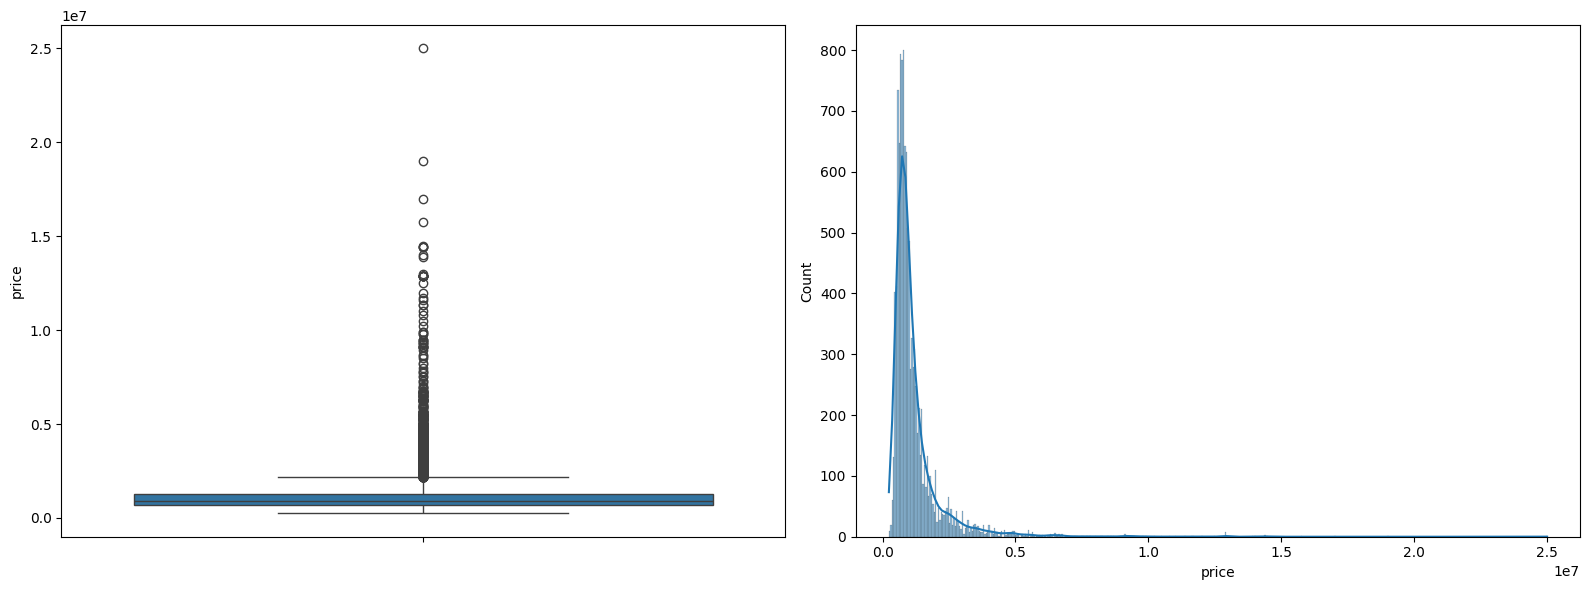

In [18]:
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=flats, y='price',ax=axes[0])
sns.histplot(data=flats, x = 'price',kde=True, ax=axes[1])
plt.tight_layout()
plt.show()

Rent

In [19]:
#we can assume (based on the market knowledge) that minimal rent is around 300 or 6PLN/m^2 and maximum rent should not exceed 50 pln per sqm (only possibly in the high-end locations like srodmiescie, wola or wilanów and high quality apartments/penthouses), additionally 

In [20]:
flats = flats.with_columns(
    (col('rent')/col('area')).round(2).alias('rent_per_sq_m')
)

In [21]:
flats.sort(by='rent', nulls_last=True ,descending=True).head(50)

id,price,rent,area,extras,price_per_sq_m,no_rooms,market_type,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url,rent_per_sq_m
i64,f64,f64,f64,str,f64,str,str,str,str,i64,str,str,str,f64,f64,str,i64,str,f64
-8887335029847669836,1.019e6,960000.0,58.0,"""balcony, garage, basement, ter…",17569.0,"""9""","""secondary""","""block""","""floor_9""",10,"""plastic""","""ready_to_use""","""full_ownership""",52.192879,21.016335,"""mokotow""",1975,"""https://www.otodom.pl/pl/ofert…",16551.72
4482023358311152256,640000.0,850000.0,32.22,"""balcony, garage, basement, lif…",19863.0,"""2""","""secondary""","""block""","""floor_higher_10""",12,"""plastic""","""ready_to_use""","""limited_ownership""",52.140897,21.053389,"""ursynow""",2003,"""https://www.otodom.pl/pl/ofert…",26381.13
5347865452276548129,1.399e6,122568.0,66.17,"""balcony, garage, basement, lif…",21143.0,"""3""","""secondary""","""block""","""floor_1""",3,"""plastic""","""""","""full_ownership""",52.236118,20.893351,"""bemowo""",2020,"""https://www.otodom.pl/pl/ofert…",1852.32
-3192865308589414449,989000.0,99999.99,52.5,"""lift, balcony, garage, usable_…",18838.0,"""2""","""secondary""","""apartment""","""floor_3""",4,"""wooden""","""ready_to_use""","""full_ownership""",52.165639,21.068954,"""wilanow""",2015,"""https://www.otodom.pl/pl/ofert…",1904.76
-6993009996433667440,595000.0,64471.0,40.01,"""basement, separate_kitchen""",14871.0,"""2""","""secondary""","""block""","""floor_4""",4,"""plastic""","""""","""full_ownership""",52.244875,21.094398,"""praga--poludnie""",1959,"""https://www.otodom.pl/pl/ofert…",1611.37
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
3038092035434022045,6.9e6,3500.0,145.0,"""lift, balcony, garage""",47586.0,"""4""","""secondary""","""tenement""","""floor_1""",5,"""wooden""","""ready_to_use""","""full_ownership""",52.218655,21.017436,"""srodmiescie""",1904,"""https://www.otodom.pl/pl/ofert…",24.14
6445078832664311487,2.886e6,3500.0,148.0,"""lift, balcony, garage""",19500.0,"""4""","""secondary""","""block""","""floor_2""",5,"""""","""ready_to_use""","""full_ownership""",52.23724,21.02609,"""srodmiescie""",2001,"""https://www.otodom.pl/pl/ofert…",23.65
-8088560205435016125,4.75e6,3460.0,149.5,"""lift, balcony, air_conditionin…",31773.0,"""4""","""secondary""","""apartment""","""floor_2""",10,"""wooden""","""ready_to_use""","""full_ownership""",52.237385,21.001957,"""srodmiescie""",null,"""https://www.otodom.pl/pl/ofert…",23.14


In [22]:
flats.sort(by='rent', nulls_last=False ,descending=True).tail(50)

id,price,rent,area,extras,price_per_sq_m,no_rooms,market_type,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url,rent_per_sq_m
i64,f64,f64,f64,str,f64,str,str,str,str,i64,str,str,str,f64,f64,str,i64,str,f64
-5065524634686698783,1.39e6,0.0,62.25,"""lift, two_storey, usable_room""",22329.0,"""2""","""secondary""","""block""","""floor_5""",6,"""""","""ready_to_use""","""full_ownership""",52.238621,20.97771,"""wola""",1951,"""https://www.otodom.pl/pl/ofert…",0.0
294020109643825213,1.205698e6,0.0,75.83,"""lift, balcony, garden, garage""",15900.0,"""3""","""primary""","""block""","""floor_1""",16,"""""","""to_completion""","""full_ownership""",52.224982,20.95288,"""wola""",2027,"""https://www.otodom.pl/pl/ofert…",0.0
1238593722669303562,1.495e6,0.0,65.0,"""lift, balcony, air_conditionin…",23000.0,"""3""","""secondary""","""block""","""floor_5""",10,"""""","""""","""""",52.257095,20.978203,"""wola""",2015,"""https://www.otodom.pl/pl/ofert…",0.0
3614391878387368181,485000.0,0.0,19.47,"""lift""",24910.0,"""1""","""secondary""","""apartment""","""floor_2""",25,"""plastic""","""ready_to_use""","""full_ownership""",52.227244,20.955571,"""wola""",null,"""https://www.otodom.pl/pl/ofert…",0.0
6980047446949725586,1.366e6,0.0,64.32,"""lift, garage, usable_room""",21238.0,"""3""","""primary""","""block""","""floor_1""",7,"""plastic""","""to_completion""","""""",52.225186,20.978644,"""wola""",2026,"""https://www.otodom.pl/pl/ofert…",0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4362133669087986136,740000.0,0.0,38.0,"""lift""",19474.0,"""2""","""secondary""","""""","""floor_4""",9,"""""","""""","""""",52.268929,20.974721,"""zoliborz""",1965,"""https://www.otodom.pl/pl/ofert…",0.0
8501743770462808904,740000.0,0.0,38.0,"""lift""",19474.0,"""2""","""secondary""","""""","""floor_4""",9,"""""","""""","""""",52.268929,20.974721,"""zoliborz""",1965,"""https://www.otodom.pl/hpr/pl/o…",0.0
-5703347651038924922,4.25e6,0.0,136.4,"""balcony""",31158.0,"""6""","""secondary""","""tenement""","""floor_3""",4,"""""","""""","""full_ownership""",52.27384,20.982,"""zoliborz""",1947,"""https://www.otodom.pl/pl/ofert…",0.0


In [23]:
flats = flats.with_columns(
    pl.when(col('rent_per_sq_m').is_between(6, 50, closed='both'))
    .then('rent')
    .otherwise(None)
    .alias('rent')
)

In [24]:
flats = flats.with_columns(col('rent').ceil())

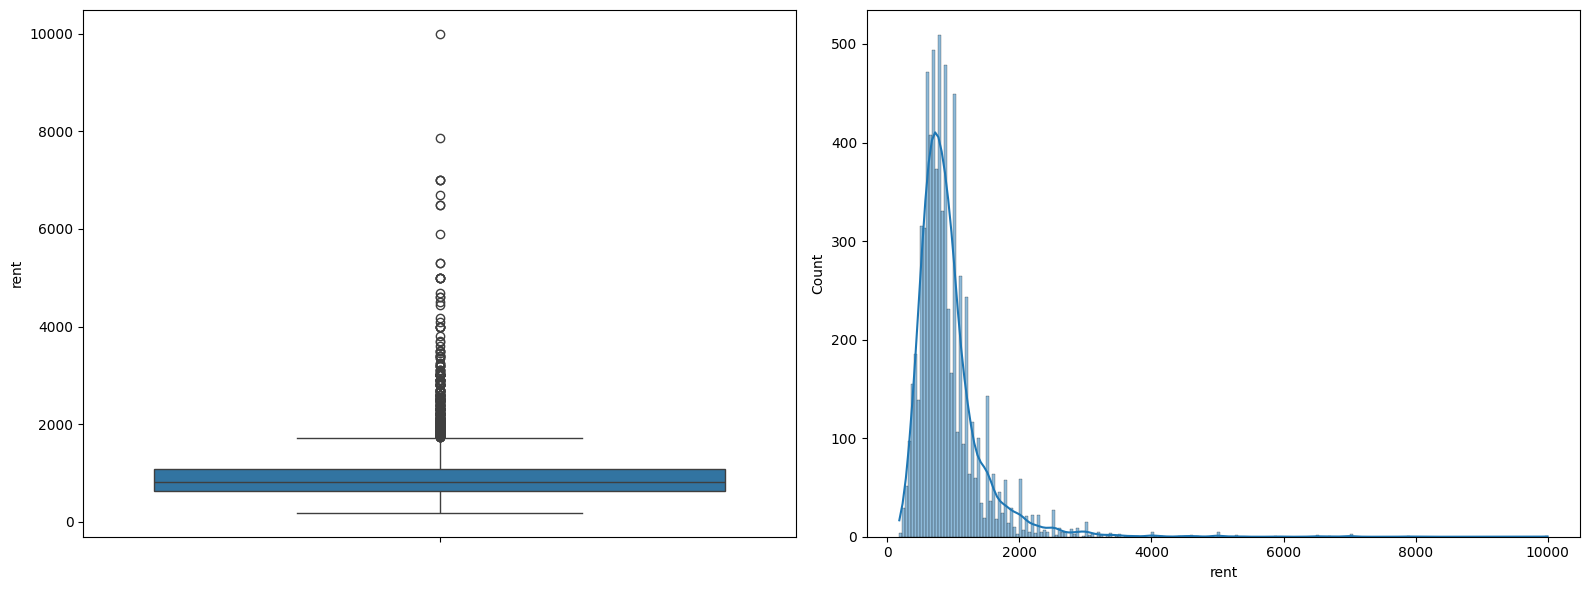

In [25]:
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=flats, y='rent',ax=axes[0])
sns.histplot(data=flats, x = 'rent',kde=True, ax=axes[1])
plt.tight_layout()
plt.show()

Price per m^2

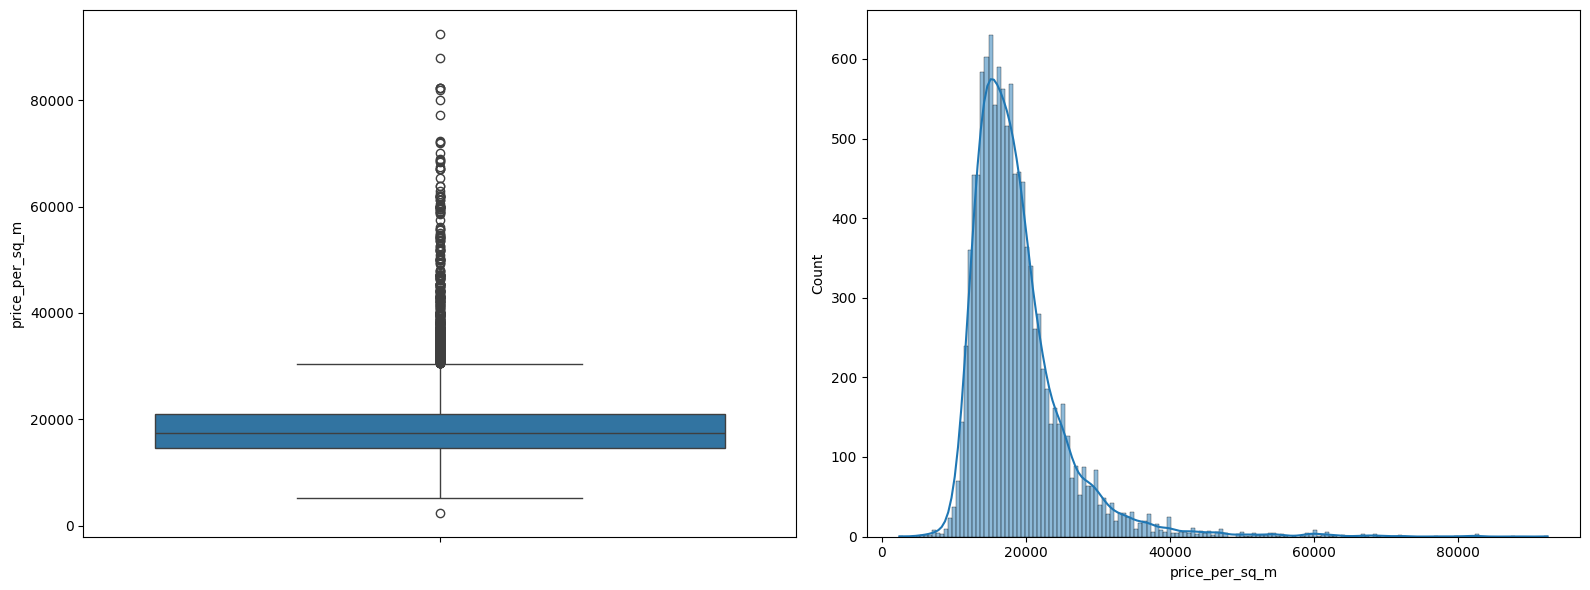

In [26]:
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=flats, y='price_per_sq_m',ax=axes[0])
sns.histplot(data=flats, x = 'price_per_sq_m',kde=True, ax=axes[1])
plt.tight_layout()
plt.show()

In [27]:
#according to market research from preavious to 12.2025 month, we can find out that the minimal price of a flat in warsaw was around 10.5k ~ 11.5k PLN -> we can conclude that bottom 1% of the market offers can be assumed to be manual mistakes or bailiff's auctions 
#we can assume that upper bound can be set to 100k since some of most luxurious apartments in Srodmiescie or Wola can reach those and purpose of this data cleaning is to create a report/visualization, not ML modelling 
flats = flats.filter(col("price_per_sq_m").is_between(10500,100000, closed='both'))

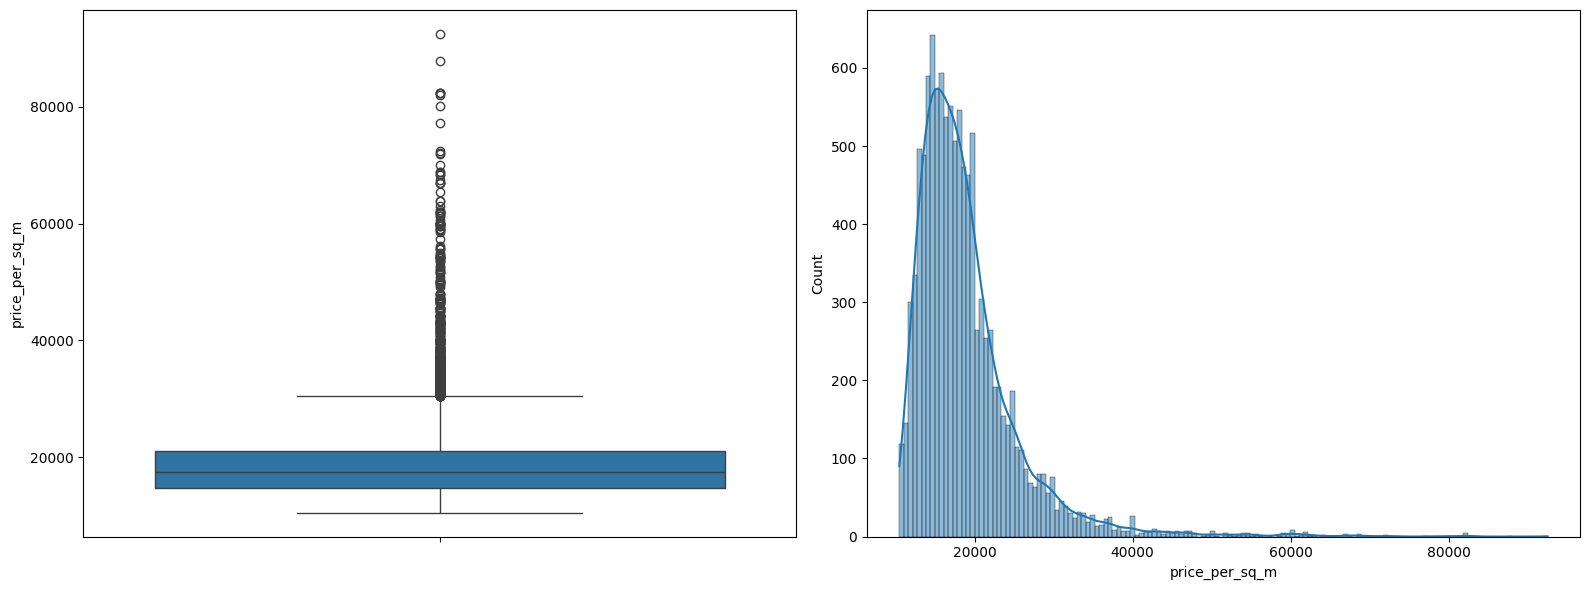

In [28]:
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=flats, y='price_per_sq_m',ax=axes[0])
sns.histplot(data=flats, x = 'price_per_sq_m',kde=True, ax=axes[1])
plt.tight_layout()
plt.show()

In [29]:
flats.describe()

statistic,id,price,rent,area,extras,price_per_sq_m,no_rooms,market_type,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url,rent_per_sq_m
str,f64,f64,f64,f64,str,f64,str,str,str,str,f64,str,str,str,f64,f64,str,f64,str,f64
"""count""",11143.0,11143.0,7002.0,11143.0,"""11143""",11143.0,"""11143""","""11143""","""11143""","""11143""",10487.0,"""11143""","""11143""","""11143""",11143.0,11143.0,"""11143""",10381.0,"""11143""",8510.0
"""null_count""",0.0,0.0,4141.0,0.0,"""0""",0.0,"""0""","""0""","""0""","""0""",656.0,"""0""","""0""","""0""",0.0,0.0,"""0""",762.0,"""0""",2633.0
"""mean""",-7.1285e16,1.2063e6,934.170666,60.921183,null,18940.357803,null,null,null,null,6.315152,null,null,null,52.228831,21.008931,null,1995.806377,null,19.559875
"""std""",5.3367e18,1.1250e6,536.344931,32.40223,null,6756.363345,null,null,null,null,4.86955,null,null,null,0.048051,0.06398,null,49.897968,null,340.33028
"""min""",-9.2218e18,237000.0,180.0,11.0,"""""",10500.0,"""1""","""primary""","""""","""""",1.0,"""""","""""","""""",52.099827,20.854778,"""bemowo""",20.0,"""https://www.otodom.pl/hpr/pl/o…",0.0
"""25%""",-4.7088e18,688000.0,630.0,40.64,null,14707.0,null,null,null,null,4.0,null,null,null,52.19479,20.965093,null,1972.0,null,10.84
"""50%""",-3.0890e16,887000.0,800.0,53.58,null,17493.0,null,null,null,null,5.0,null,null,null,52.227537,21.008492,null,2009.0,null,14.71
"""75%""",4.5264e18,1.28e6,1065.0,69.4,null,21000.0,null,null,null,null,8.0,null,null,null,52.253987,21.05547,null,2023.0,null,17.65
"""max""",9.2220e18,2.5e7,10000.0,500.0,"""usable_room, terrace, balcony,…",92471.0,"""more""","""secondary""","""tenement""","""ground_floor""",54.0,"""wooden""","""to_renovation""","""usufruct""",52.364384,21.25482,"""zoliborz""",2028.0,"""https://www.otodom.pl/pl/ofert…",26381.13


Year

In [30]:
#year should be no lower 1890 (around, oldest non comercial apartments in warsaw known) till current year + 2 years (planned investments)
flats = flats.filter(     (col('built_year').is_between(1890, datetime.now().year + 2)) | (col('built_year').is_null()) )

Number of rooms

In [31]:
flats = flats.with_columns(
    pl.when(col('no_rooms').str.contains(r'\d'))  
    .then(col('no_rooms').str.extract(r'(\d+)').cast(pl.Int64)) 
    .otherwise(None)
    )

Number of floors in a building

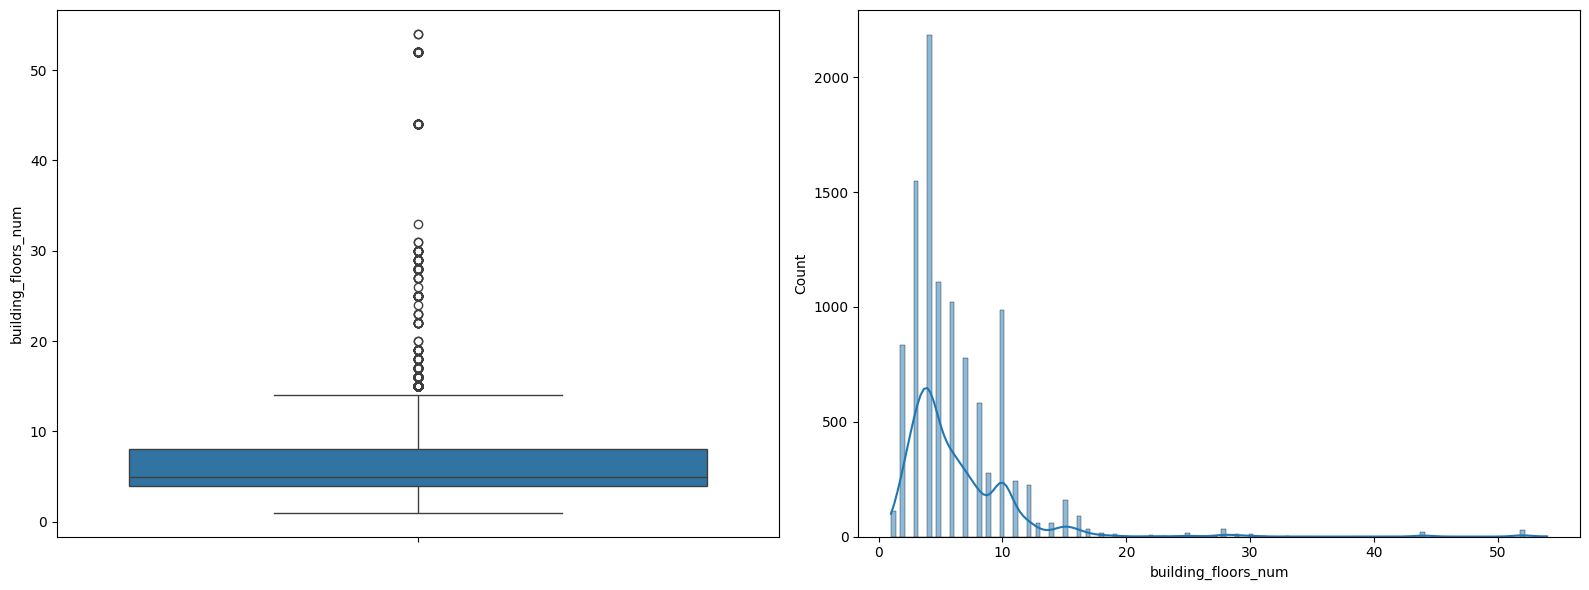

In [32]:
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=flats, y='building_floors_num',ax=axes[0])
sns.histplot(data=flats, x = 'building_floors_num',kde=True, ax=axes[1])
plt.tight_layout()
plt.show()

In [33]:
#according to the charts and descriptive statistic, most of the buildings are around 4 to 8 floors, taller buildings which can be seen on the chart are also possible hence will not be excluded,
#however, the upper bound can be set to 54 floors since the tallest residential building in warsaw is Zlota 44 with 52~54 floors (depending on how we coun them) and lower bound has to be at least 0 (ground floor)
flats = flats.filter(col('building_floors_num').is_between(0,54, closed='both'))

Floor number

In [34]:
flats.unique(subset='no_floor').select('no_floor').to_series().to_list()

['floor_3',
 'floor_higher_10',
 'floor_5',
 'floor_9',
 'floor_10',
 'ground_floor',
 'cellar',
 'garret',
 'floor_2',
 'floor_7',
 'floor_8',
 'floor_1',
 'floor_4',
 '',
 'floor_6']

In [35]:
flats = flats.with_columns(
    pl.when(col('no_floor').str.contains(r'\d'))  
    .then(col('no_floor').str.extract(r'(\d+)').cast(pl.Int64)) 
    .when(col('no_floor') == 'ground_floor')
    .then(0)
    .when(col('no_floor') == 'cellar')
    .then(-1)
    .when(col('no_floor') == 'garret')
    .then(col('building_floors_num')) 
    .otherwise(None)
    .alias('no_floor')
)

Area

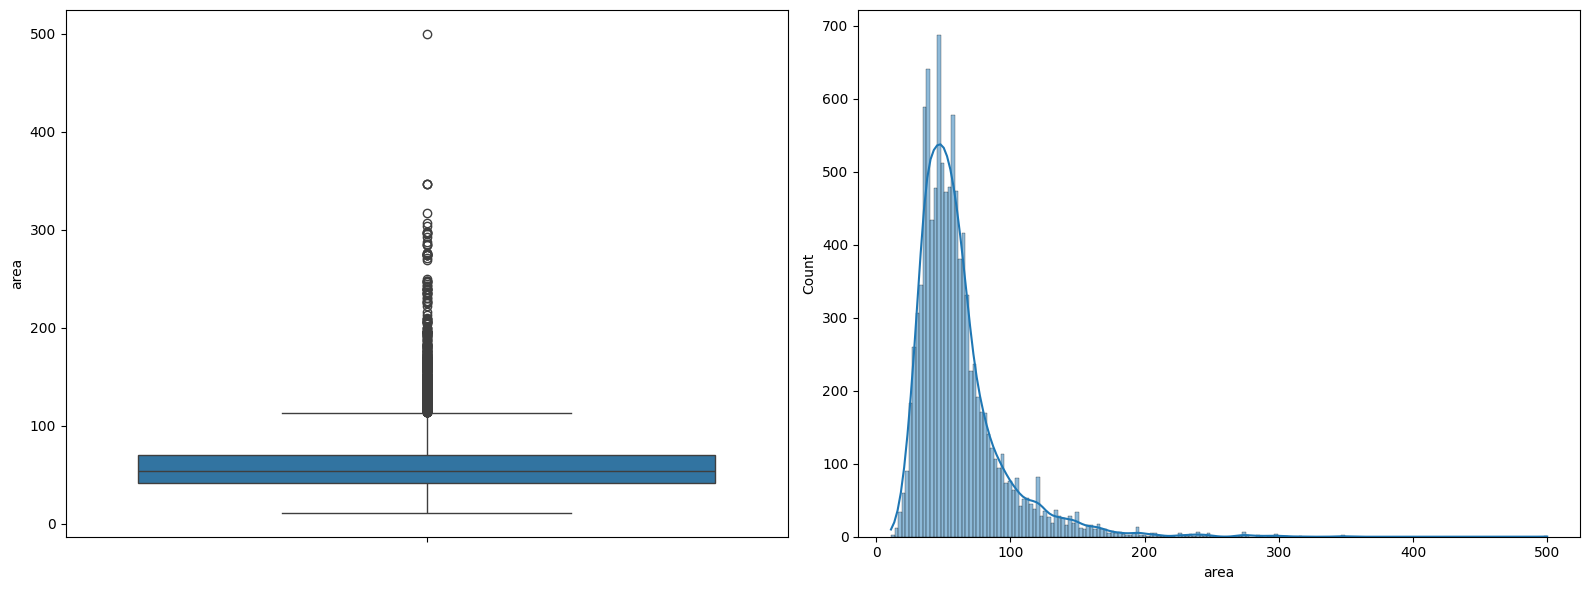

In [36]:
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=flats, y='area',ax=axes[0])
sns.histplot(data=flats, x = 'area',kde=True, ax=axes[1])
plt.tight_layout()
plt.show()

In [37]:
#from the chart above we can see that there are singular records of flats which are too big to be true as a single apartment (probably manual mistakes) or specific outliers, based on domain knowledge and warsaw property market it makes sense to set the threshold to 350 m^2
# the rest are upper class outliers and those which are below 15m2 can be marked as bottom outliers

flats = flats.filter(col('area').is_between(15,350,closed='both'))

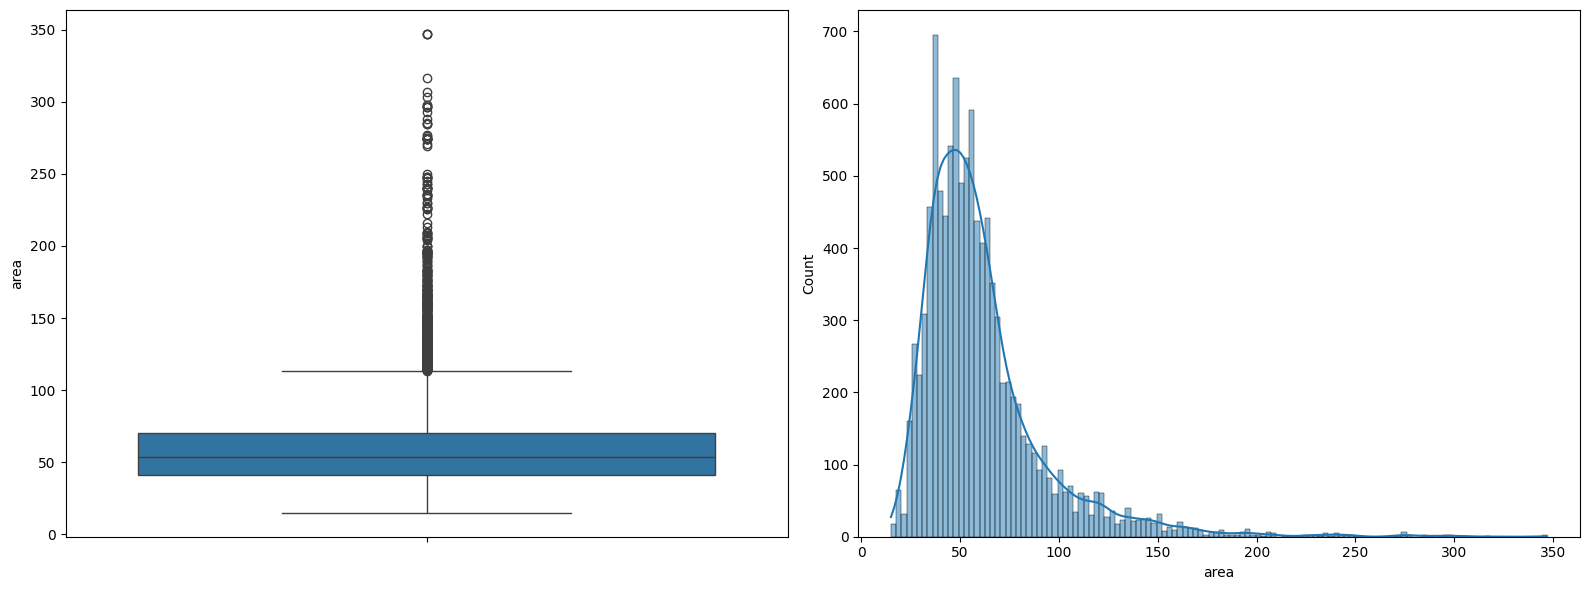

In [38]:
#after removing extreme obserervations it can be seen that, flat areas in warsaw have a right skewed distribution which makes sense considering that there are many more flats which have a smaller area - between 30 to 100 sqm then the rest (penthouses etc)
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=flats, y='area',ax=axes[0])
sns.histplot(data=flats, x = 'area',kde=True, ax=axes[1])
plt.tight_layout()
plt.show()

Text columns

In [39]:
#filling nulls in text columns with 'unknown'

flats = flats.with_columns(
    cs.string()
    .str.strip_chars()
    .replace("", "unknown")
    .fill_null("unknown")
)


In [40]:
flats.columns

['id',
 'price',
 'rent',
 'area',
 'extras',
 'price_per_sq_m',
 'no_rooms',
 'market_type',
 'building_type',
 'no_floor',
 'building_floors_num',
 'windows_type',
 'construction_status',
 'building_ownership',
 'lat',
 'long',
 'district',
 'built_year',
 'url',
 'rent_per_sq_m']

In [41]:
cat_columns = ['building_type','windows_type','construction_status', 'building_ownership']

In [42]:
flats = flats.with_columns(
    col(c)
    .str.replace_all('_', ' ')
    .str.to_titlecase()
    .cast(pl.Categorical)
    for c in cat_columns
)

In [43]:
flats = flats.with_columns(
    col('district')
    .str.replace_all('--', '-')
    .str.to_titlecase()
    .cast(pl.Categorical)
)

In [44]:
flats = flats.with_columns(
    (col('rent')/col('area')).alias('rent_per_sq_m')
)

In [45]:
flats.describe()

statistic,id,price,rent,area,extras,price_per_sq_m,no_rooms,market_type,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url,rent_per_sq_m
str,f64,f64,f64,f64,str,f64,f64,str,str,f64,f64,str,str,str,f64,f64,str,f64,str,f64
"""count""",10464.0,10464.0,6818.0,10464.0,"""10464""",10464.0,10462.0,"""10464""","""10464""",10386.0,10464.0,"""10464""","""10464""","""10464""",10464.0,10464.0,"""10464""",9832.0,"""10464""",6818.0
"""null_count""",0.0,0.0,3646.0,0.0,"""0""",0.0,2.0,"""0""","""0""",78.0,0.0,"""0""","""0""","""0""",0.0,0.0,"""0""",632.0,"""0""",3646.0
"""mean""",-5.7555e16,1.2221e6,936.432678,61.3868,null,19045.029625,2.624546,null,null,3.026093,6.318903,null,null,null,52.229345,21.01101,null,1995.900325,null,16.015439
"""std""",5.3383e18,1.1361e6,538.125798,32.446254,null,6765.288951,0.996083,null,null,2.63256,4.872893,null,null,null,0.048362,0.062405,null,30.072777,null,4.305286
"""min""",-9.2218e18,261000.0,180.0,15.0,"""air_conditioning""",10500.0,1.0,"""primary""",null,-1.0,1.0,null,null,null,52.099827,20.854778,null,1890.0,"""https://www.otodom.pl/hpr/pl/o…",6.0
"""25%""",-4.6966e18,695000.0,640.0,41.0,null,14841.0,2.0,null,null,1.0,4.0,null,null,null,52.194251,20.967909,null,1972.0,null,13.274696
"""50%""",3.0697e14,897000.0,810.0,54.0,null,17570.0,3.0,null,null,2.0,5.0,null,null,null,52.228526,21.01056,null,2008.0,null,15.643803
"""75%""",4.5459e18,1.299e6,1072.0,70.0,null,21117.0,3.0,null,null,4.0,8.0,null,null,null,52.254743,21.056601,null,2022.0,null,18.25
"""max""",9.2220e18,2.5e7,10000.0,347.0,"""usable_room, terrace, balcony,…",92471.0,9.0,"""secondary""",null,10.0,54.0,null,null,null,52.364384,21.25482,null,2028.0,"""https://www.otodom.pl/pl/ofert…",47.65625


In [46]:
extra_features = (
    flats.select(
        col('extras')
        .str.split(',')
        .explode()
        .str.strip_chars()
    )
    .filter(col('extras') != '') #removing empty strings
    .select(
        col('extras').value_counts()
    )
    .unnest('extras')
    .sort(by='count', descending=True)
)
extra_features.head(20)

extras,count
str,u32
"""lift""",7240
"""balcony""",6340
"""garage""",6145
"""basement""",3607
"""separate_kitchen""",2391
…,…
"""air_conditioning""",1355
"""terrace""",1168
"""garden""",929


In [47]:
features = extra_features.select(col('extras')).to_series().to_list()
features

['lift',
 'balcony',
 'garage',
 'basement',
 'separate_kitchen',
 'usable_room',
 'air_conditioning',
 'terrace',
 'garden',
 'unknown',
 'two_storey']

In [48]:
features_cols = [
    col('extras')
    .str.contains(str.lower(f),literal = True)
    .cast(pl.Int8)
    .alias(f)
    for f in features
    if f != 'unknown'
]

flats = flats.with_columns(features_cols)
flats = flats.select(pl.exclude('extras'))
flats.head(30)

id,price,rent,area,price_per_sq_m,no_rooms,market_type,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url,rent_per_sq_m,lift,balcony,garage,basement,separate_kitchen,usable_room,air_conditioning,terrace,garden,two_storey
i64,f64,f64,f64,f64,i64,str,cat,i64,i64,cat,cat,cat,f64,f64,cat,i64,str,f64,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8
2733784444739916632,822000.0,692.0,46.41,17712.0,2,"""secondary""","""Block""",3,5,"""Plastic""","""Ready To Use""","""Full Ownership""",52.256687,20.932893,"""Bemowo""",2006,"""https://www.otodom.pl/pl/ofert…",14.91058,1,1,0,0,0,0,0,0,0,0
1760504099202448542,1.14e6,830.0,52.99,21513.0,3,"""secondary""","""Block""",0,5,"""Unknown""","""Ready To Use""","""Full Ownership""",52.2198,20.896981,"""Bemowo""",2018,"""https://www.otodom.pl/pl/ofert…",15.663333,1,0,1,0,0,0,1,1,1,0
-5928285467007780437,1.131634e6,null,74.45,15200.0,4,"""primary""","""Apartment""",1,5,"""Unknown""","""To Completion""","""Unknown""",52.23266,20.896844,"""Bemowo""",null,"""https://www.otodom.pl/pl/ofert…",null,1,1,1,0,0,0,0,1,0,0
-3302733610605828522,1.414987e6,null,90.0,15722.0,5,"""primary""","""Apartment""",1,5,"""Unknown""","""To Completion""","""Unknown""",52.227951,20.880627,"""Bemowo""",null,"""https://www.otodom.pl/pl/ofert…",null,1,1,1,0,0,0,0,1,0,0
9059771879511685920,779000.0,596.0,40.0,19475.0,2,"""secondary""","""Apartment""",3,6,"""Unknown""","""To Completion""","""Full Ownership""",52.226296,20.896134,"""Bemowo""",2024,"""https://www.otodom.pl/pl/ofert…",14.9,1,1,1,0,1,0,0,1,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-890926331694039955,1.29e6,700.0,61.53,20965.0,3,"""secondary""","""Unknown""",6,6,"""Unknown""","""Ready To Use""","""Full Ownership""",52.242007,20.909883,"""Bemowo""",2017,"""https://www.otodom.pl/pl/ofert…",11.376564,1,1,1,0,0,0,0,0,0,0
-1936446398876949830,520000.0,650.0,30.82,16872.0,2,"""secondary""","""Unknown""",2,11,"""Unknown""","""To Renovation""","""Full Ownership""",52.224776,20.91243,"""Bemowo""",1975,"""https://www.otodom.pl/pl/ofert…",21.090201,0,0,0,1,0,0,0,0,0,0
8355184039476183532,670000.0,1000.0,46.0,14565.0,2,"""secondary""","""Block""",5,10,"""Plastic""","""Ready To Use""","""Full Ownership""",52.229678,20.901395,"""Bemowo""",1980,"""https://www.otodom.pl/pl/ofert…",21.73913,1,1,0,1,1,0,0,0,0,0


In [49]:
#market type can be either primary or secondary(potential third option is null if not filled); encoding it as a binary value
flats = flats.with_columns(
    col('market_type').replace_strict(
        {'primary': 1, 'secondary': 0}, 
        default=None
    ).cast(pl.Int8)
    .alias('is_primary')
)

flats = flats.drop('market_type')

In [50]:
flats

id,price,rent,area,price_per_sq_m,no_rooms,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url,rent_per_sq_m,lift,balcony,garage,basement,separate_kitchen,usable_room,air_conditioning,terrace,garden,two_storey,is_primary
i64,f64,f64,f64,f64,i64,cat,i64,i64,cat,cat,cat,f64,f64,cat,i64,str,f64,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8
2733784444739916632,822000.0,692.0,46.41,17712.0,2,"""Block""",3,5,"""Plastic""","""Ready To Use""","""Full Ownership""",52.256687,20.932893,"""Bemowo""",2006,"""https://www.otodom.pl/pl/ofert…",14.91058,1,1,0,0,0,0,0,0,0,0,0
1760504099202448542,1.14e6,830.0,52.99,21513.0,3,"""Block""",0,5,"""Unknown""","""Ready To Use""","""Full Ownership""",52.2198,20.896981,"""Bemowo""",2018,"""https://www.otodom.pl/pl/ofert…",15.663333,1,0,1,0,0,0,1,1,1,0,0
-5928285467007780437,1.131634e6,null,74.45,15200.0,4,"""Apartment""",1,5,"""Unknown""","""To Completion""","""Unknown""",52.23266,20.896844,"""Bemowo""",null,"""https://www.otodom.pl/pl/ofert…",null,1,1,1,0,0,0,0,1,0,0,1
-3302733610605828522,1.414987e6,null,90.0,15722.0,5,"""Apartment""",1,5,"""Unknown""","""To Completion""","""Unknown""",52.227951,20.880627,"""Bemowo""",null,"""https://www.otodom.pl/pl/ofert…",null,1,1,1,0,0,0,0,1,0,0,1
9059771879511685920,779000.0,596.0,40.0,19475.0,2,"""Apartment""",3,6,"""Unknown""","""To Completion""","""Full Ownership""",52.226296,20.896134,"""Bemowo""",2024,"""https://www.otodom.pl/pl/ofert…",14.9,1,1,1,0,1,0,0,1,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1191148879188779156,1.1e6,850.0,50.0,22000.0,3,"""Block""",0,10,"""Plastic""","""Ready To Use""","""Full Ownership""",52.2749,20.962025,"""Zoliborz""",2016,"""https://www.otodom.pl/pl/ofert…",17.0,1,0,1,0,0,0,1,1,1,0,0
-1581560747639262196,920000.0,940.0,64.48,14268.0,3,"""Block""",4,4,"""Plastic""","""Ready To Use""","""Full Ownership""",52.271121,20.960416,"""Zoliborz""",1968,"""https://www.otodom.pl/pl/ofert…",14.578164,0,1,0,1,1,0,0,0,0,0,0
4047240373042390779,3.6e6,3386.0,236.0,15254.0,6,"""Apartment""",2,2,"""Wooden""","""Ready To Use""","""Unknown""",52.266819,20.972621,"""Zoliborz""",1999,"""https://www.otodom.pl/pl/ofert…",14.347458,0,1,0,1,1,0,0,0,1,0,0


In [51]:
#adding unique identifier as hash for later loading of data into sql db
flats = flats.with_columns(
    pl.struct(pl.all())
    .hash()
    .reinterpret(signed=True)
    .alias('id')
)

flats = flats.select(['id'] + [col for col in flats.columns if col != 'id'])
flats

id,price,rent,area,price_per_sq_m,no_rooms,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url,rent_per_sq_m,lift,balcony,garage,basement,separate_kitchen,usable_room,air_conditioning,terrace,garden,two_storey,is_primary
i64,f64,f64,f64,f64,i64,cat,i64,i64,cat,cat,cat,f64,f64,cat,i64,str,f64,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8
4062682895583317981,822000.0,692.0,46.41,17712.0,2,"""Block""",3,5,"""Plastic""","""Ready To Use""","""Full Ownership""",52.256687,20.932893,"""Bemowo""",2006,"""https://www.otodom.pl/pl/ofert…",14.91058,1,1,0,0,0,0,0,0,0,0,0
-2584928789657076347,1.14e6,830.0,52.99,21513.0,3,"""Block""",0,5,"""Unknown""","""Ready To Use""","""Full Ownership""",52.2198,20.896981,"""Bemowo""",2018,"""https://www.otodom.pl/pl/ofert…",15.663333,1,0,1,0,0,0,1,1,1,0,0
-951741821565558293,1.131634e6,null,74.45,15200.0,4,"""Apartment""",1,5,"""Unknown""","""To Completion""","""Unknown""",52.23266,20.896844,"""Bemowo""",null,"""https://www.otodom.pl/pl/ofert…",null,1,1,1,0,0,0,0,1,0,0,1
-4972992191619270260,1.414987e6,null,90.0,15722.0,5,"""Apartment""",1,5,"""Unknown""","""To Completion""","""Unknown""",52.227951,20.880627,"""Bemowo""",null,"""https://www.otodom.pl/pl/ofert…",null,1,1,1,0,0,0,0,1,0,0,1
6135538675914567048,779000.0,596.0,40.0,19475.0,2,"""Apartment""",3,6,"""Unknown""","""To Completion""","""Full Ownership""",52.226296,20.896134,"""Bemowo""",2024,"""https://www.otodom.pl/pl/ofert…",14.9,1,1,1,0,1,0,0,1,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
431393669461272470,1.1e6,850.0,50.0,22000.0,3,"""Block""",0,10,"""Plastic""","""Ready To Use""","""Full Ownership""",52.2749,20.962025,"""Zoliborz""",2016,"""https://www.otodom.pl/pl/ofert…",17.0,1,0,1,0,0,0,1,1,1,0,0
-6944936373859135128,920000.0,940.0,64.48,14268.0,3,"""Block""",4,4,"""Plastic""","""Ready To Use""","""Full Ownership""",52.271121,20.960416,"""Zoliborz""",1968,"""https://www.otodom.pl/pl/ofert…",14.578164,0,1,0,1,1,0,0,0,0,0,0
4076816535262148494,3.6e6,3386.0,236.0,15254.0,6,"""Apartment""",2,2,"""Wooden""","""Ready To Use""","""Unknown""",52.266819,20.972621,"""Zoliborz""",1999,"""https://www.otodom.pl/pl/ofert…",14.347458,0,1,0,1,1,0,0,0,1,0,0


In [52]:
flats = flats.with_columns(pl.lit(curr_month + '-01').cast(pl.Date).alias('date_scraped'))

In [53]:
flats

id,price,rent,area,price_per_sq_m,no_rooms,building_type,no_floor,building_floors_num,windows_type,construction_status,building_ownership,lat,long,district,built_year,url,rent_per_sq_m,lift,balcony,garage,basement,separate_kitchen,usable_room,air_conditioning,terrace,garden,two_storey,is_primary,date_scraped
i64,f64,f64,f64,f64,i64,cat,i64,i64,cat,cat,cat,f64,f64,cat,i64,str,f64,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,date
4062682895583317981,822000.0,692.0,46.41,17712.0,2,"""Block""",3,5,"""Plastic""","""Ready To Use""","""Full Ownership""",52.256687,20.932893,"""Bemowo""",2006,"""https://www.otodom.pl/pl/ofert…",14.91058,1,1,0,0,0,0,0,0,0,0,0,2026-01-01
-2584928789657076347,1.14e6,830.0,52.99,21513.0,3,"""Block""",0,5,"""Unknown""","""Ready To Use""","""Full Ownership""",52.2198,20.896981,"""Bemowo""",2018,"""https://www.otodom.pl/pl/ofert…",15.663333,1,0,1,0,0,0,1,1,1,0,0,2026-01-01
-951741821565558293,1.131634e6,null,74.45,15200.0,4,"""Apartment""",1,5,"""Unknown""","""To Completion""","""Unknown""",52.23266,20.896844,"""Bemowo""",null,"""https://www.otodom.pl/pl/ofert…",null,1,1,1,0,0,0,0,1,0,0,1,2026-01-01
-4972992191619270260,1.414987e6,null,90.0,15722.0,5,"""Apartment""",1,5,"""Unknown""","""To Completion""","""Unknown""",52.227951,20.880627,"""Bemowo""",null,"""https://www.otodom.pl/pl/ofert…",null,1,1,1,0,0,0,0,1,0,0,1,2026-01-01
6135538675914567048,779000.0,596.0,40.0,19475.0,2,"""Apartment""",3,6,"""Unknown""","""To Completion""","""Full Ownership""",52.226296,20.896134,"""Bemowo""",2024,"""https://www.otodom.pl/pl/ofert…",14.9,1,1,1,0,1,0,0,1,0,0,0,2026-01-01
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
431393669461272470,1.1e6,850.0,50.0,22000.0,3,"""Block""",0,10,"""Plastic""","""Ready To Use""","""Full Ownership""",52.2749,20.962025,"""Zoliborz""",2016,"""https://www.otodom.pl/pl/ofert…",17.0,1,0,1,0,0,0,1,1,1,0,0,2026-01-01
-6944936373859135128,920000.0,940.0,64.48,14268.0,3,"""Block""",4,4,"""Plastic""","""Ready To Use""","""Full Ownership""",52.271121,20.960416,"""Zoliborz""",1968,"""https://www.otodom.pl/pl/ofert…",14.578164,0,1,0,1,1,0,0,0,0,0,0,2026-01-01
4076816535262148494,3.6e6,3386.0,236.0,15254.0,6,"""Apartment""",2,2,"""Wooden""","""Ready To Use""","""Unknown""",52.266819,20.972621,"""Zoliborz""",1999,"""https://www.otodom.pl/pl/ofert…",14.347458,0,1,0,1,1,0,0,0,1,0,0,2026-01-01


In [54]:
flats.write_csv(f'flats_{curr_month}.csv', separator=';', quote_char='"', quote_style='non_numeric')